# P1 - Time Series Analysis

Due date: July 18, 2021, 11:59 pm

- The result will be evaluated from a report in Jupyter, which must be found in a public GitHub repository.
- The project must be carried out in the groups assigned in class.
- Use clear and rigorous procedures.
- Due date: July 18, 2021, 11:59 pm, through Bloque Neón + (Upload repository link)
- Projects will not be received after the delivery time or by any other means than the one established.

The project seeks to analyze a question of interest, which can be framed within a context, in order to interpret the results

1. Choosing your time series (Friday July 11th).

For the project, each group must select a dataset of their choice where the analysis can be performed using a time series model. There are many sources of time series data on the Internet. Government agencies are some of the best sources. But be resourceful. It is better to find a data set is from a process that interests you. Use a recent time-series, also try to avoid a tipical stock-price / exchange rates series. The selected time series must be sent no later than Sunday, July 11, 11:59 pm, through Sicua +, for approval.

The analysis of the data must consider:

2. Analysis of the context of the problem and relevance of the analysis: This should answer the question of why it is interesting or important to study the selected data.

3. Understanding the data: Understand and analyze the main components of the time series, for example: seasonality, cyclicity, autocorrelation, behavior of the residuals, among others. Make use of graphs that allow you to understand each of the components clearly.

4. Application of the models in predictions: Correct use of the models seen in class to make predictions related to the problem of interest.

5. Conclusions: The conclusions must be relevant to the problem of interest. Conclusions on the procedures performed are also expected.

In [74]:
import pandas as pd
import holidays_co
import matplotlib.pyplot as plt

In [42]:
!pip install holidays_co

In [2]:
df = pd.read_csv('../datasets/dataset_proyecto1.zip')

In [3]:
df.head()
df.columns

Index(['date', 'warehouse_id_ref', 'itemid', 'demand', 'pending_demand',
       'lastPrice', 'Price', 'stock', 'available_stock', 'city',
       'CAT_ACCESORIOS', 'CAT_EXPOPET', 'CAT_SNACKS', 'CAT_MEDICINAS',
       'CAT_CUIDADO_E_HIGIENE', 'CAT_JUGUETES', 'CAT_ALIMENTO_PRESCRIPCION',
       'CAT_HIGIENE', 'CAT_REGALOS', 'CAT_PARA_PETLOVERS', 'CAT_FARMAPET',
       'CAT_PREMIOS', 'CAT_VETERINARIOS', 'CAT_ALIMENTO', 'CAT_COMBOS',
       'CAT_ARENAS'],
      dtype='object')

In [4]:
df['ALIMENTOS'] = (df.CAT_SNACKS + df.CAT_ALIMENTO_PRESCRIPCION + df.CAT_ALIMENTO) >= 1
df['ALIMENTOS'] = df.ALIMENTOS.astype('int')
df.head()

,date,warehouse_id_ref,itemid,demand,pending_demand,lastPrice,Price,stock,available_stock,city,...,CAT_HIGIENE,CAT_REGALOS,CAT_PARA_PETLOVERS,CAT_FARMAPET,CAT_PREMIOS,CAT_VETERINARIOS,CAT_ALIMENTO,CAT_COMBOS,CAT_ARENAS,ALIMENTOS
0,2020-08-17T00:00:00.000Z,1,9953,0,0,11560.0,11560.0,3.0,1.0,Bogota,...,0,0,0,1,0,0,0,0,0,0
1,2020-08-18T00:00:00.000Z,1,9953,0,0,11560.0,11560.0,3.0,1.0,Bogota,...,0,0,0,1,0,0,0,0,0,0
2,2020-08-19T00:00:00.000Z,1,9953,2,0,11560.0,11560.0,3.0,1.0,Bogota,...,0,0,0,1,0,0,0,0,0,0
3,2020-08-20T00:00:00.000Z,1,9953,0,0,11560.0,11560.0,3.0,1.0,Bogota,...,0,0,0,1,0,0,0,0,0,0
4,2020-08-21T00:00:00.000Z,1,9953,0,0,11560.0,11560.0,3.0,1.0,Bogota,...,0,0,0,1,0,0,0,0,0,0


In [5]:
df = df[['date', 'warehouse_id_ref', 'itemid', 'demand', 'pending_demand', 
         'lastPrice', 'Price', 'stock', 'available_stock', 'city', 'ALIMENTOS']]

In [6]:
df_alimentos = df[df.ALIMENTOS == 1]
df_no_alimentos = df[df.ALIMENTOS == 0]
print( df.shape ) 
print( df_alimentos.shape ) 
print( df_no_alimentos.shape ) 

(2286885, 11)
(1423388, 11)
(863497, 11)


In [7]:
df_alimentos.head()

,date,warehouse_id_ref,itemid,demand,pending_demand,lastPrice,Price,stock,available_stock,city,ALIMENTOS
330,2020-08-17T00:00:00.000Z,1,10642,0,0,3299.0,3299.0,266.0,1.0,Bogota,1
331,2020-08-18T00:00:00.000Z,1,10642,16,2,3299.0,3299.0,266.0,1.0,Bogota,1
332,2020-08-19T00:00:00.000Z,1,10642,5,0,3299.0,3299.0,266.0,1.0,Bogota,1
333,2020-08-20T00:00:00.000Z,1,10642,20,0,3299.0,3299.0,266.0,1.0,Bogota,1
334,2020-08-21T00:00:00.000Z,1,10642,2,0,3299.0,3299.0,266.0,1.0,Bogota,1


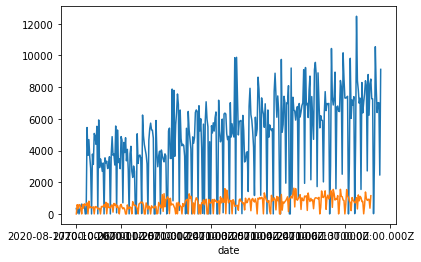

In [8]:
df_alimentos.groupby('date')['demand'].sum().plot()
df_no_alimentos.groupby('date')['demand'].sum().plot()

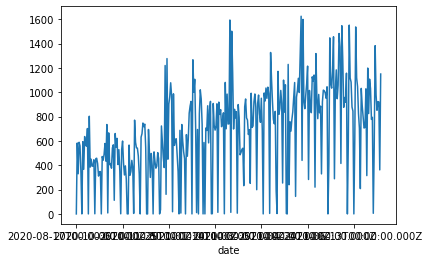

In [9]:
df_no_alimentos.groupby('date')['demand'].sum().plot()

In [25]:
df_alimentos.date = pd.to_datetime(df_alimentos.date)
df_alimentos = df_alimentos.dropna()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [32]:
df_alimentos.date.dt.weekday.isin([5,6])

330        False
331        False
332        False
333        False
334        False
           ...  
2286880    False
2286881    False
2286882     True
2286883     True
2286884    False
Name: date, Length: 1390647, dtype: bool

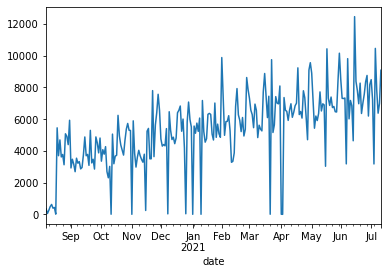

In [36]:
df_alimentos_sin_fds = df_alimentos[ ~df_alimentos.date.dt.weekday.isin([5,6]) ]
df_alimentos_sin_fds.groupby('date')['demand'].sum().plot()

In [37]:
df_alimentos_sin_fds.date.dt.weekday.value_counts()

0    202132
4    198486
3    197832
2    197264
1    196644
Name: date, dtype: int64

In [41]:
pd.date_range(start = df_alimentos.date.min(), 
              end = df_alimentos.date.max() ).difference(df_alimentos.date)

DatetimeIndex([], dtype='datetime64[ns, UTC]', freq=None)

In [49]:
df_alimentos.date.min()
df_alimentos.date.max()

Timestamp('2021-07-12 00:00:00+0000', tz='UTC')

In [52]:
festivos = [ x[0] for x in (holidays_co.get_colombia_holidays_by_year(2020) + holidays_co.get_colombia_holidays_by_year(2021)) ]
festivos

[datetime.date(2020, 1, 1),
 datetime.date(2020, 1, 6),
 datetime.date(2020, 3, 23),
 datetime.date(2020, 4, 9),
 datetime.date(2020, 4, 10),
 datetime.date(2020, 5, 1),
 datetime.date(2020, 5, 25),
 datetime.date(2020, 6, 15),
 datetime.date(2020, 6, 22),
 datetime.date(2020, 6, 29),
 datetime.date(2020, 7, 20),
 datetime.date(2020, 8, 7),
 datetime.date(2020, 8, 17),
 datetime.date(2020, 10, 12),
 datetime.date(2020, 11, 2),
 datetime.date(2020, 11, 16),
 datetime.date(2020, 12, 8),
 datetime.date(2020, 12, 25),
 datetime.date(2021, 1, 1),
 datetime.date(2021, 1, 11),
 datetime.date(2021, 3, 22),
 datetime.date(2021, 4, 1),
 datetime.date(2021, 4, 2),
 datetime.date(2021, 5, 1),
 datetime.date(2021, 5, 17),
 datetime.date(2021, 6, 7),
 datetime.date(2021, 6, 14),
 datetime.date(2021, 7, 5),
 datetime.date(2021, 7, 20),
 datetime.date(2021, 8, 7),
 datetime.date(2021, 8, 16),
 datetime.date(2021, 10, 18),
 datetime.date(2021, 11, 1),
 datetime.date(2021, 11, 15),
 datetime.date(2021, 

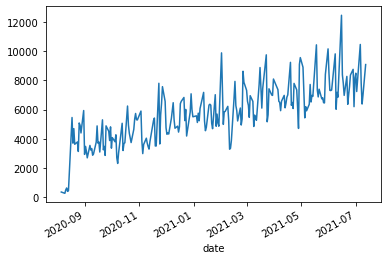

In [53]:
df_alimentos_sin_fds_ni_festivos = df_alimentos_sin_fds[ ~df_alimentos_sin_fds.date.isin( festivos ) ]
df_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum().plot()


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


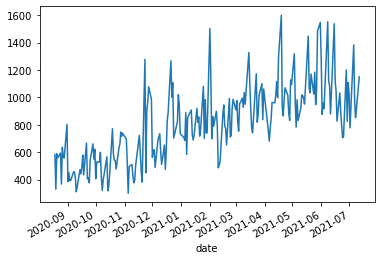

In [55]:
df_no_alimentos.date = pd.to_datetime(df_no_alimentos.date)
df_no_alimentos_sin_fds = df_no_alimentos[ ~df_no_alimentos.date.dt.weekday.isin([5,6]) ]
df_no_alimentos_sin_fds_ni_festivos = df_no_alimentos_sin_fds[ ~df_no_alimentos_sin_fds.date.isin( festivos ) ]
df_no_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum().plot()

3. Understanding the data: Understand and analyze the main components of the time series, for example: seasonality, cyclicity, autocorrelation, behavior of the residuals, among others. Make use of graphs that allow you to understand each of the components clearly.

4. Application of the models in predictions: Correct use of the models seen in class to make predictions related to the problem of interest.

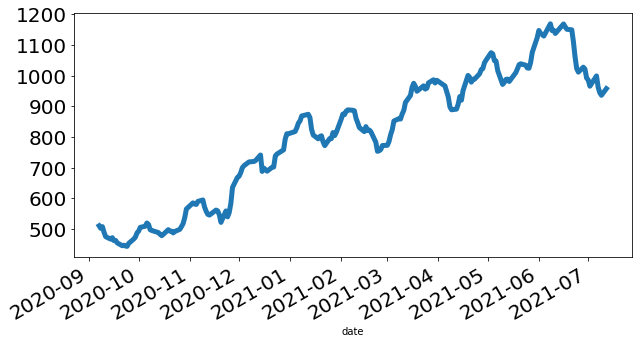

In [71]:
df_no_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum().rolling(15).mean().plot(figsize=(10,5), linewidth=5, fontsize=20)

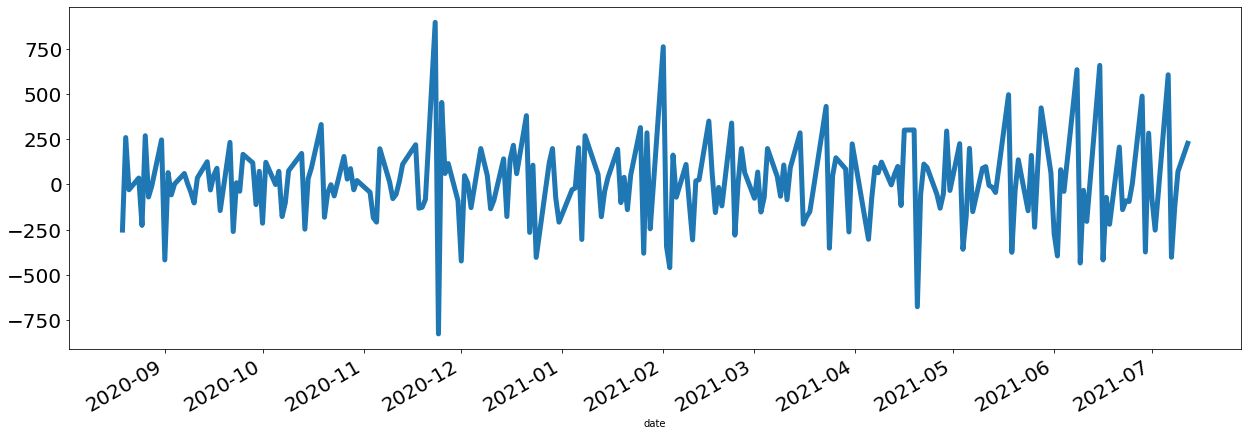

In [66]:
df_no_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum().diff().plot(figsize=(21,7), linewidth=5, fontsize=20)

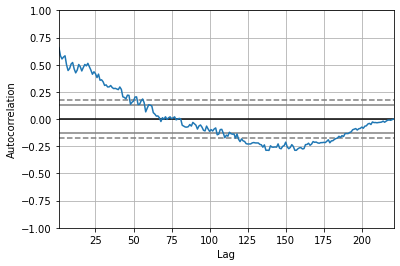

In [67]:
pd.plotting.autocorrelation_plot(df_no_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum())

In [68]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

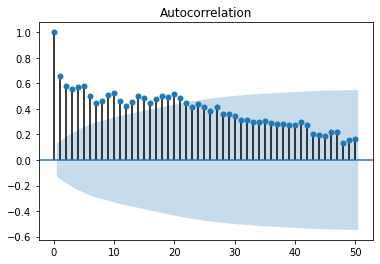

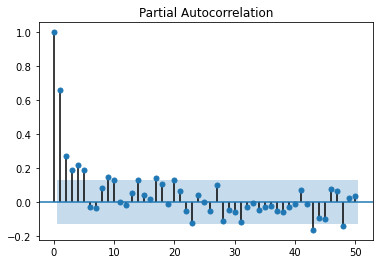

In [69]:
plot_acf( df_no_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum(), lags=50);
plot_pacf( df_no_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum(), lags=50);

In [76]:
from statsmodels.tsa.arima_model import ARIMA

series = df_no_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum()

# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                             ARIMA Model Results                              
Dep. Variable:               D.demand   No. Observations:                  220
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1467.914
Method:                       css-mle   S.D. of innovations            190.894
Date:                Thu, 15 Jul 2021   AIC                           2949.827
Time:                        20:28:28   BIC                           2973.583
Sample:                             1   HQIC                          2959.420
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.3822      4.783      0.498      0.618      -6.992      11.756
ar.L1.D.demand    -0.6237      0.068     -9.225      0.000      -0.756      -0.491
ar.L2.D.demand    -0.4744      0.078

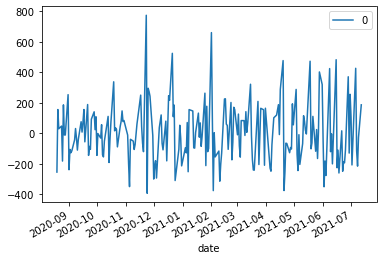

In [77]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

        predict  real
0    859.612963   777
1    946.358499   741
2   1042.569744  1172
3    983.953459   819
4    995.809253   868
..          ...   ...
71  1205.372306  1383
72  1159.755291   980
73  1243.420998   852
74  1215.270099   923
75  1313.503687  1150

[76 rows x 2 columns]
Test MSE: 51061.492


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


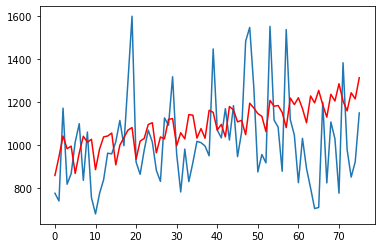

In [110]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
future = [x for x in test]

model = ARIMA(history, order=(6,1,5))
model_fit = model.fit(disp=0)
output = model_fit.forecast(steps=len(test))[0]
yhat = output
predictions = yhat
real_values = future

print(pd.DataFrame({'predict':predictions, 'real':real_values}))

from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [99]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

#Iterando

results = []

for p in range(0,9):
        
    for d in range(0,4):
                
        for q in range(0,6):
            
            try:
                
                # Create and fit ARMA(p,q) model
                X = series.values
                size = int(len(X) * 0.66)
                train, test = X[0:size], X[size:len(X)]
                history = [x for x in train]
                future = [x for x in test]

                model = ARIMA(history, order=(p,d,q))
                model_fit = model.fit(disp=0)
                output = model_fit.forecast(steps=len(test))[0]
                yhat = output
                predictions = yhat
                real_values = future
                error = mean_squared_error(test, predictions)

                # Print p, q, AIC, BIC
                #print(p, d, q, 'Test MSE: %.3f' % error) 
                results.append([p,d,q,error])
                
            except:
                #print(p, d, q, None )
                results.append([p,d,q,None])
                
df = pd.DataFrame(results,columns=['p','d','q','mse'])

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(

In [107]:
df.loc[df['mse'] == df['mse'].min()]

,p,d,q,mse
74,3,0,2,43389.705175


In [105]:
df['mse'].min()

43389.70517452426

In [113]:
from prophet.plot import add_changepoints_to_plot
from prophet import Prophet
import pandas as pd
import numpy as np
%matplotlib inline

In [123]:
df_prophet = pd.DataFrame( series ).reset_index().rename(columns={'date':'ds','demand':'y'})
df_prophet.ds = df_prophet.ds.dt.date

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


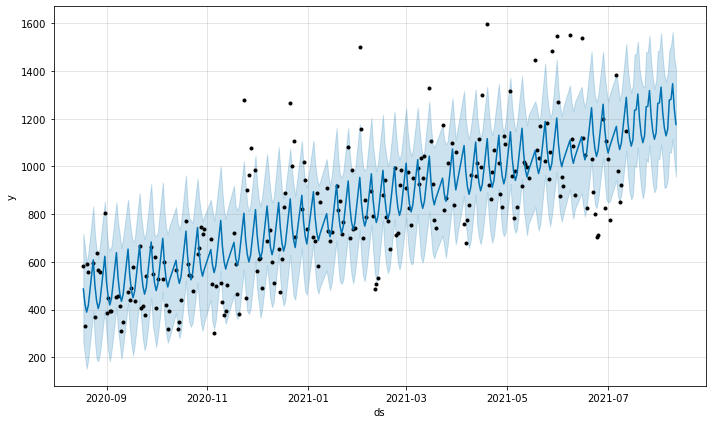

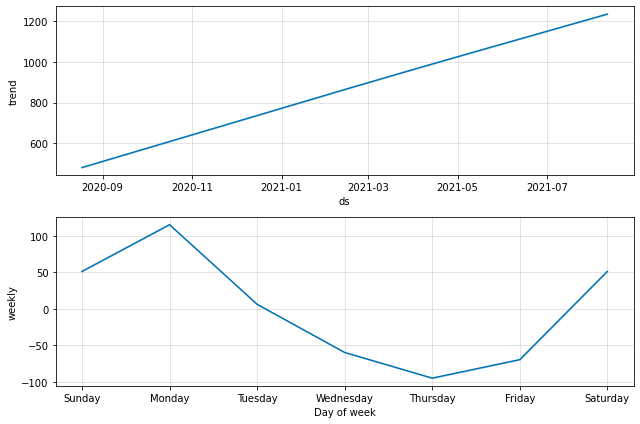

In [124]:
m = Prophet()
m.fit(df_prophet)

future = m.make_future_dataframe(periods=30, freq='D')

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


fig1 = m.plot(forecast)


m.plot_components(forecast);

In [130]:
festivos_col = [ (x[0],x[1]) for x in (holidays_co.get_colombia_holidays_by_year(2020) + holidays_co.get_colombia_holidays_by_year(2021)) ]
df_festivos_col = pd.DataFrame( festivos_col, columns=['ds','holiday'])
df_festivos_col

,ds,holiday
0,2020-01-01,Año Nuevo
1,2020-01-06,Día de los Reyes Magos
2,2020-03-23,Día de San José
3,2020-04-09,Jueves Santo
4,2020-04-10,Viernes Santo
5,2020-05-01,Día del Trabajo
6,2020-05-25,Ascensión del Señor
7,2020-06-15,Corphus Christi
8,2020-06-22,Sagrado Corazón de Jesús
9,2020-06-29,San Pedro y San Pablo


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


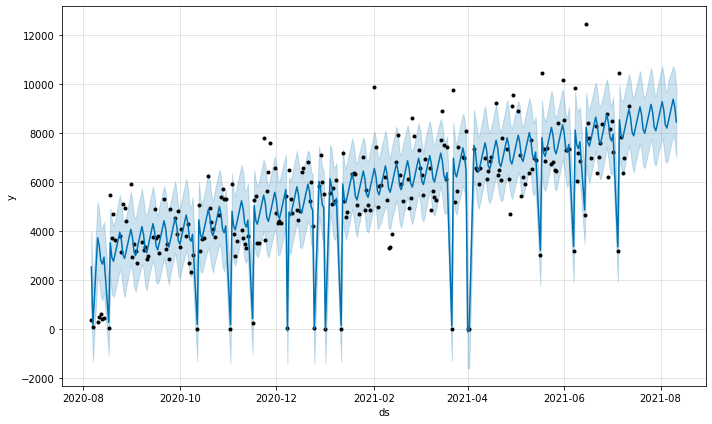

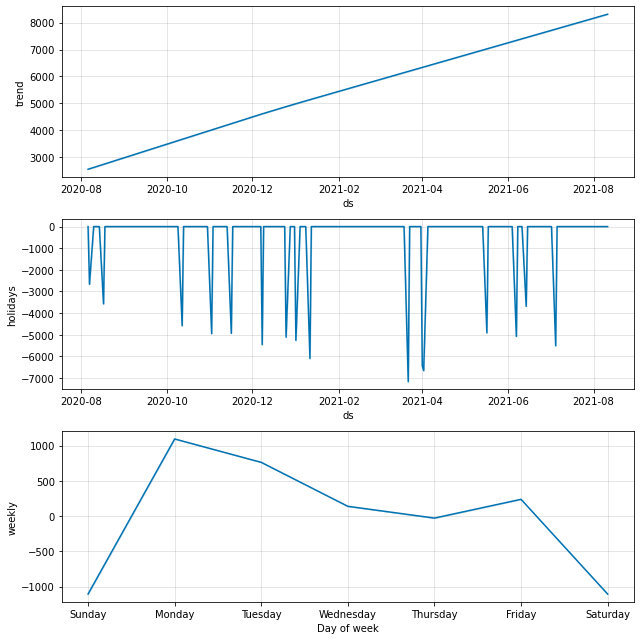

In [133]:
series = df_alimentos_sin_fds.groupby('date')['demand'].sum()

df_prophet = pd.DataFrame( series ).reset_index().rename(columns={'date':'ds','demand':'y'})
df_prophet.ds = df_prophet.ds.dt.date

m = Prophet(holidays = df_festivos_col)
m.fit(df_prophet)

future = m.make_future_dataframe(periods=30, freq='D')
future = future[ ~future.ds.dt.weekday.isin([5,6]) ]

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


fig1 = m.plot(forecast)


m.plot_components(forecast);